# 1-11. 프로젝트 (1) load_digits: 손글씨를 분류해 봅시다

라이브러리 버전 확인하기.

In [1]:
import sklearn

print(sklearn.__version__)

0.24.2


## (1) 필요한 모듈 import하기

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## (2) 데이터 준비

In [3]:
# load_digits 메서드 사용 및 지정
digits_dataset = load_digits()

In [4]:
# digits의 데이터 종류
digits_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
# digits 의 data 형태
digits_dataset.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
type(digits_dataset.data)

numpy.ndarray

In [7]:
# digits의 데이터는 64개의 numpy.ndarray 형태 자료가 1797개 있음을 확인.
digits_dataset.data.shape

(1797, 64)

In [8]:
type(digits_dataset.feature_names)

list

In [9]:
digits_dataset.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [10]:
digits_dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
digits_dataset.target.shape

(1797,)

In [12]:
# digits의 target_names 는 10가지
digits_dataset.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## (3) 데이터 이해하기

In [13]:
# Feature Data 지정하기
digits_data = digits_dataset.data

In [14]:
digits_data.shape
# digits의 데이터는 손글씨 이미지 데이터이므로 array 64 형태의 픽셀값 이 저장.

(1797, 64)

In [15]:
type(digits_data)

numpy.ndarray

<function matplotlib.pyplot.show(close=None, block=None)>

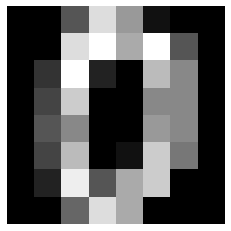

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits_data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show

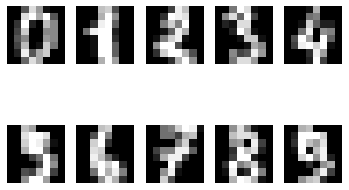

In [17]:
for i in range(10):
    # 10개의 이미지를 2행 5열로 표시
    plt.subplot(2, 5, i+1)
    # plt.imshow()는 (m,n) 형태의 데이터를 입력으로 받기 때문에 reshape로 형태를 바꿔줘야 함.
    # 데이터 셋에 64개의 데이터가 일렬로 늘어져있으니 (8,8) 형태로 변형시켜줘야 함.
    plt.imshow(digits_data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [18]:
# label Data 지정하기
digits_label = digits_dataset.target

In [19]:
digits_label.shape
# digits label 형태

(1797,)

In [20]:
# Target Names 출력해 보기
digits_dataset.target_names
# digits label의 분류

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
for i in range(10):
    print(f'{i} :', len(digits_label[digits_label == i]))
    
# 각 target_names마다 데이터가 올바르게 분포해있음을 확인할 수 있음.

0 : 178
1 : 182
2 : 177
3 : 183
4 : 181
5 : 182
6 : 181
7 : 179
8 : 174
9 : 180


In [22]:
# 데이터 Describe 해 보기
print(digits_dataset.DESCR)
# digits 의 데이터 셋 설명문.

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## (4) train, test 데이터 분리

In [23]:
# 나눠야 할 데이터 dgits_data, 라벨 digits_label, data와 label을 각각 train:test = 7.5:2.5 비율로 나눠서 저장.
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, random_state=0, stratify=digits_label)

In [24]:
# 7.5:2.5로 잘 나뉘어져 있음을 확인.
print(len(X_train), len(X_test), len(y_train), len(y_test))

1347 450 1347 450


In [25]:
label_name, count = np.unique(y_train, return_counts=True)
print('-----train_target-----')
for i in label_name:
    print(f'{label_name[i]}: {count[i]}')
label_name, count = np.unique(y_test, return_counts=True)
print('-----test_target-----')
for i in label_name:
    print(f'{label_name[i]}: {count[i]}')

-----train_target-----
0: 133
1: 136
2: 133
3: 137
4: 136
5: 136
6: 136
7: 134
8: 131
9: 135
-----test_target-----
0: 45
1: 46
2: 44
3: 46
4: 45
5: 46
6: 45
7: 45
8: 43
9: 45


## (5) 다양한 모델로 학습시켜보기

In [26]:
# Decision Tree 사용해 보기
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        45
           1       0.93      0.80      0.86        46
           2       0.89      0.89      0.89        44
           3       0.75      0.83      0.78        46
           4       0.82      0.82      0.82        45
           5       0.85      0.87      0.86        46
           6       0.95      0.91      0.93        45
           7       0.84      0.91      0.87        45
           8       0.76      0.81      0.79        43
           9       0.88      0.78      0.82        45

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450



* 총 10개의 target 중 1,2,3,9번 4개에 해당되는 정확도가 낮아서 해당 모델은 digits 데이터 셋에 적합하지 않다고 판단합니다.

In [27]:
# Random Forest 사용해 보기
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.96      1.00      0.98        46
           2       1.00      0.98      0.99        44
           3       0.98      0.96      0.97        46
           4       0.98      0.98      0.98        45
           5       1.00      0.98      0.99        46
           6       1.00      1.00      1.00        45
           7       0.98      1.00      0.99        45
           8       0.93      0.98      0.95        43
           9       1.00      0.98      0.99        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



* 모든 target에 고르게 정확도가 높으니 digits 데이터 셋에 적합한 모델이라고 판단됩니다.

In [28]:
# SVM 사용해 보기
from sklearn.svm import SVC

svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.96      1.00      0.98        46
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        46
           4       1.00      0.96      0.98        45
           5       0.98      1.00      0.99        46
           6       1.00      1.00      1.00        45
           7       0.98      1.00      0.99        45
           8       0.95      0.95      0.95        43
           9       1.00      0.98      0.99        45

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



* 앞서 실행한 높은 정확도를 가진 Random Forest보다도 정확도가 더 양호하여 digits 데이터 셋에 매우 적합한 모델이라고 생각합니다.  
* SVM의 일대다 이진 분류 알고리즘이 digits 데이터 셋의 다중 클래스 분류에 유용한 모델이라서 그런것일까 생각해 봅니다.

In [29]:
# SGD Classifier 사용해 보기
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(random_state=0)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.82      0.98      0.89        46
           2       1.00      0.98      0.99        44
           3       0.96      0.96      0.96        46
           4       0.98      0.96      0.97        45
           5       0.98      0.96      0.97        46
           6       0.98      0.98      0.98        45
           7       1.00      0.93      0.97        45
           8       0.97      0.81      0.89        43
           9       0.86      0.96      0.91        45

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



* SGDClassifier 모델도 전체적으로 digits 데이터 셋에 준수한 모델 성능을 찾추고 있는것 같습니다.

In [30]:
# Logistic Regression 사용해 보기
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.85      0.98      0.91        46
           2       1.00      0.98      0.99        44
           3       0.94      1.00      0.97        46
           4       1.00      0.96      0.98        45
           5       0.98      0.93      0.96        46
           6       0.98      0.98      0.98        45
           7       0.98      0.93      0.95        45
           8       0.95      0.86      0.90        43
           9       0.93      0.96      0.95        45

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



* LogisticRegression 모델도 digits 데이터 셋에 대해서 양호한 성능을 보여주고 있습니다.

In [31]:
# 5가지 모델의 accuracy_score 점수 모아서 표기. 
from sklearn.metrics import accuracy_score

model_list = {'DecisionTreeClassifier' : DecisionTreeClassifier,
              'RandomForestClassifier' : RandomForestClassifier,
              'SVM' : SVC,
              'SGDClassifier' : SGDClassifier,
              'LogisticRegression' : LogisticRegression}

for name, func in model_list.items():
    model = func(random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f'{name} score: {accuracy_score(y_test, y_pred):,.2f}' )

DecisionTreeClassifier score: 0.86
RandomForestClassifier score: 0.98
SVM score: 0.99
SGDClassifier score: 0.95
LogisticRegression score: 0.96


## (6) 모델을 평가해 보기

digits 데이터 셋은 주어진 숫자 이미지가 0부터 9까지의 10개의 숫자 중 해당하는 숫자와 같은지 측정하는 다중 분류 데이터 셋입니다.
해당 데이터 셋을 봤을 때, label의 데이터가 해당 데이터의 분류에 균등하게 분포되어 있음을 확인할 수 있고, 제시되는 이미지의 숫자가 대응되는 숫자로 올바르게 인식되는지 맞추는 문제이므로,  
평가지표로 accuracy가 적합할 것 같다고 판단했습니다.

# 1-12. 프로젝트 (2) load_wine: 와인을 분류해 봅시다

## (1) 필요한 모듈 import 하기

In [32]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

## (2) 데이터 준비

In [33]:
# load_wine 메서드를 사용합니다.
wine = load_wine()

wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

## (3) 데이터 이해하기

In [34]:
# Feature Data 지정하기
wine_data = wine['data']

In [35]:
# Label Data 지정하기
wine_label = wine['target']

In [36]:
# Target Names 출력해 보기
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [37]:
# 데이터 Describe 해 보기
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [38]:
# DESCR에 있는 내용처럼 각각 50개쯤 있음을 확인. - Number of Instances: 178 (50 in each of three classes)
#                                       - Class Distribution: class_0 (59), class_1 (71), class_2 (48)
for i, j in enumerate(wine.target_names):
    print(f'{j}:' ,len(wine_label[wine_label == i]))

class_0: 59
class_1: 71
class_2: 48


In [39]:
# DESCR에 적힌 특성 13개 확인. - Number of Attributes: 13 numeric
print(len(wine.feature_names), wine.feature_names, sep='\n')

13
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [40]:
print(wine.data[0])

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]


## (4) train, test 데이터 분리

In [41]:
# 나눠야 할 데이터 wine_data, 라벨 wine_label, data와 label을 각각 train:test = 7.5:2.5 비율로 나눠서 저장.
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, random_state=0, stratify=wine_label)

In [42]:
len(X_train), len(X_test), len(y_train), len(y_test)

(133, 45, 133, 45)

In [43]:
label_name, count = np.unique(y_train, return_counts=True)
print('-----train_target-----')
for i in label_name:
    print(f'class_{label_name[i]}: {count[i]}')
label_name, count = np.unique(y_test, return_counts=True)
print('-----test_target-----')
for i in label_name:
    print(f'class_{label_name[i]}: {count[i]}')

-----train_target-----
class_0: 44
class_1: 53
class_2: 36
-----test_target-----
class_0: 15
class_1: 18
class_2: 12


## (5) 다양한 모델로 학습시켜보기

In [44]:
# Decision Tree 사용해 보기
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.85      0.94      0.89        18
           2       1.00      0.92      0.96        12

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



* 해당 모델은 precision에서 class_0, recall에서 class_1에 정확도가 부진하므로 wine 데이터 셋에 적합한 모델이 아니라고 판단됩니다.

In [45]:
# Random Forest 사용해 보기
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



* 전체적으로 균일하게 수치가 높으니 wine 데이터 셋에 대해 가장 적합한 성능을 보여준다고 생각합니다.

In [46]:
# SVM 사용해 보기
from sklearn.svm import SVC

svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.64      0.78      0.70        18
           2       0.25      0.17      0.20        12

    accuracy                           0.60        45
   macro avg       0.54      0.56      0.54        45
weighted avg       0.57      0.60      0.58        45



* 해당 모델은 유독 class_2 라벨에 낮은 정확도를 보여주어 wine 데이터 셋에 적합하지 않습니다.

In [47]:
# SGD Classifier 사용해 보기
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(random_state=0)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      1.00      0.61        15
           1       0.83      0.28      0.42        18
           2       0.20      0.08      0.12        12

    accuracy                           0.47        45
   macro avg       0.49      0.45      0.38        45
weighted avg       0.53      0.47      0.40        45



* 수치가 유독 이상한 항목이 있어, 해당 모델은 wine 데이터 셋에 매우 적합하지 않은 모델로 생각됩니다.

In [48]:
# Logistic Regression 사용해 보기
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.94      0.89      0.91        18
           2       0.92      1.00      0.96        12

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



* 해당 모델은 wine 데이터 셋에 무난하게 좋은 성능을 보여주고 있다고 생각합니다.

In [49]:
from sklearn.metrics import recall_score

model_list = {'DecisionTreeClassifier' : DecisionTreeClassifier,
              'RandomForestClassifier' : RandomForestClassifier,
              'SVM' : SVC,
              'SGDClassifier' : SGDClassifier,
              'LogisticRegression' : LogisticRegression}

for name, func in model_list.items():
    model = func(random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # recall이면서 데이터가 조금 불균형한 데이터라서 가중치가 없는
    print(f'{name} score: {recall_score(y_test, y_pred, average="macro"):,.2f}' )

DecisionTreeClassifier score: 0.89
RandomForestClassifier score: 1.00
SVM score: 0.56
SGDClassifier score: 0.45
LogisticRegression score: 0.94


## (6) 모델을 평가해 보기

wine은 데이터셋은 와인의 등급을 0, 1, 2 로 나누는 다중 분류 데이터셋 이라 생각 합니다.  
해당 데이터의 결과로 와인의 등급이 매겨질때, 소비자의 입장에서 낮은 등급이라 생각하고 구매했는데 높은 등급일 때는 좋은 거지만,  
높은 등급의 와인이라고 생각하고 구매를 했는데 낮은 등급일때는 나쁜경우인 상황인데,  
recall 지표가 양성인데 음성으로 판단할때 업무상 큰 영향이 발생하는 경우에 해당하므로  
적정 class에 해당하면 1 아니면 0인 상황이라서 recall 지표를 선택하는게 맞다고 생각합니다.

# 1-13. 프로젝트 (3) load_breast_cancer: 유방암 여부를 진단해 봅시다

## (1) 필요한 모듈 import하기

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

## (2) 데이터 준비

In [51]:
# load_breast_cancer 메서드를 사용합니다.
cancer = load_breast_cancer()
# 
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

## (3) 데이터 이해하기

In [52]:
# Feature Data 지정하기
cancer_data = cancer.data

In [53]:
# Label Data 지정하기
cancer_label = cancer.target

In [54]:
# Target Names 출력해 보기
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [55]:
# 데이터 Describe 해 보기
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [56]:
# 유방암 데이터의 모양 (Number of Instances: 569, Number of Attributes: 30 numeric)
cancer_data.shape
# DESCR에 적혀있는데로 569개의 데이터가 있고, 각 데이터에는 30개의 데이터가 담겨있습니다.

(569, 30)

In [57]:
# DESCR에 적힌것과 같이 악성에 해당하는 0이 212개, 
#                      양성에 해당하는 1이 357개입니다. 
# (Class Distribution: 212 - Malignant, 357 - Benign)
_, count = np.unique(cancer.target, return_counts=True)
print(f'악성 :{count[0]}, 양성 :{count[1]}')

악성 :212, 양성 :357


In [58]:
# Feature names 30개...
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## (4) train, test 데이터 분리

In [59]:
# 나눠야 할 데이터 cancer_data, 라벨 cancer_label, data와 label을 각각 train:test = 7.5:2.5 비율로 나눠서 저장.
X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_label, random_state=0)

In [60]:
len(X_train), len(X_test), len(y_train), len(y_test)

(426, 143, 426, 143)

In [61]:
label_name, count = np.unique(y_train, return_counts=True)
print('-----train_target-----')
for i in label_name:
    print(f'{label_name[i]}: {count[i]}')
label_name, count = np.unique(y_test, return_counts=True)
print('-----test_target-----')
for i in label_name:
    print(f'{label_name[i]}: {count[i]}')

-----train_target-----
0: 159
1: 267
-----test_target-----
0: 53
1: 90


## (5) 다양한 모델로 학습시켜보기

In [62]:
# Decision Tree 사용해 보기
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        53
           1       0.96      0.84      0.90        90

    accuracy                           0.88       143
   macro avg       0.87      0.89      0.88       143
weighted avg       0.90      0.88      0.88       143



* 해당 모델의 성능이 cancer 데이터 셋에는 조금 부진한 지표를 보여주어 적합한 모델이 아니라고 생각합니다.

In [63]:
# Random Forest 사용해 보기
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        53
           1       0.99      0.97      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



* 전체적으로 고루 높은 수치를 보여주어 cancer 데이터셋에 매우 적합한 모델이라고 생각됩니다.

In [64]:
# SVM 사용해 보기
from sklearn.svm import SVC

svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91        53
           1       0.92      0.99      0.95        90

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



* racall target 0에 상대적으로 조금 낮은 수치가 기록됬지만, cancer 데이터 셋에 양호한 성능을 보여주고 있습니다.

In [65]:
# SGD Classifier 사용해 보기
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(random_state=0)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        53
           1       0.93      0.96      0.95        90

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



* 전체적으로 cancer 데이터 셋에 대해서 무난한 성능을 보여주고 있습니다.

In [66]:
# Logistic Regression 사용해 보기
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        53
           1       0.99      0.94      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



* 가장 널리 알려진 모델인만큼 cancer 데이터 셋에 대해서 좋은 성능을 보여주고 있습니다.

In [67]:
from sklearn.metrics import precision_score

model_list = {'DecisionTreeClassifier' : DecisionTreeClassifier,
              'RandomForestClassifier' : RandomForestClassifier,
              'SVM' : SVC,
              'SGDClassifier' : SGDClassifier,
              'LogisticRegression' : LogisticRegression}

for name, func in model_list.items():
    model = func(random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # precision 이면서 양성 데이터가 많아서 가중치가 없는 average="macro"를 선택.
    print(f'{name} score: {precision_score(y_test, y_pred, average="macro"):,.2f}' )

DecisionTreeClassifier score: 0.87
RandomForestClassifier score: 0.97
SVM score: 0.95
SGDClassifier score: 0.93
LogisticRegression score: 0.95


## (6) 모델을 평가해 보기

breast cancer의 데이터셋으로 만든 모델은 해당 종양이 암이 맞는지를 예측하는 이진 분류 모델입니다.  
해당 모델의 성능을 평가하는 지표로는 precision을 선택하는게 맞다고 생각했습니다.  
precision은 음성을 양성으로 잘못 판단하게되면 큰문제가 생기는 경우에 사용되는 지표입니다.  
해당 모델의 결과로 한 사람의 암진단 결과가 암인데 암이 아니라고 예측되는 경우에는 큰 문제를 발생하는 경우에 해당하고, 여기서는 음성인 0일때 암이고, 양성인 1일때 종양인 경우에 해당되서
평가지표 중 precision에 해당 한다고 생각합니다.

# 회고

해당 과제를 진행하면서 각 데이터셋의 정보를 찾던중 digits 데이터셋은 사실 70000개의 데이터가 있는 큰 데이터셋이었다는 것과, wine 분류 문제는 화학적데이터로 레드와인의 등급을 구별하는 문제였다는 것, 그리고 wine 데이터 셋은 Fisher 라는 분의 판별분석이란 것에 연관이 있다는 것과 sklearn에도 sklearn.discriminant_analysis라는 모듈이 있다는것 등 다양한 사실을 알게되었고,  
각 데이터 셋의 평가 지표는 무엇을 기준으로 삼아야하는지 해당 분류가 단순 모델 정확도를 보는것인지, 모델 정확도를 본다고 생각 했지만 상업적으로 이용되는 형태면 상업적으로 봤을때 기준인지 등 바라보는 시선에 따라 다른것 같아서 많이 고민되는 문제였다는것을 알게되었습니다.

RandomForest는 세 데이터 셋 모두에 좋은 성능을 발휘하는 모델이었다는 것을 알게되었고,

train_test_split의 train_size와 test_size의 기본값은 .25인걸 알았습니다.
train_test_split 에서 랜덤으로 데이터들을 뽑아온다고 하는데, 해당 과정에서 특정 target의 데이터만 많이 뽑아서 적절한 학습이 이루어지지 않을 경우에 대해 의문이 생겼었는데, 찾아보니 해당 문제는 stratify 옵션으로 해결이 된다고 합니다, 해당 옵션은 원래 target에 따른 데이터 비율과 같게 데이터를 랜덤으로 가져오는 옵션입니다.

sklearn.metric의 recall_score나 precision_score를 사용할 경우 average 옵션을 설정해달라는 에러가 뜨는데, 해당 옵션중 micro는 accuracy와 같은 값이 나오고, macro의 경우 각 label에 대해 연산후 평균값을 출력하는데, weighted는 평균값에 label에 해당하는 data에 개수에 가중치를 주어 평균을 구한값이라고 합니다.
그에 따라 개인적인 기준으로 recall과 precision score출력시 해당 데이터셋에 맞게 선택해 보았습니다.

해당 과제를 진행하면서 데이터 셋에 대한 분석과 모델 학습, 예측, 평가 지표 선정 등의 과정을 수행해보고 각 과정에서 사용되는 함수들을 살펴보고 그 안의 메소드들의 사용법들을 알게되어, 기존의 모델만을 그냥 가져와서 사용하던 수준에서 조금은 벗어난것 같아서 개인적으로 기쁜 시작이 된것같아 좋았습니다.